In [1]:
import pandas as pd;
import matplotlib.pyplot as plt;
import math;

from scipy.integrate import quad;
from scipy.signal import butter, lfilter, filtfilt

dataGyro = pd.DataFrame(pd.read_csv('gyro.csv').rolling(window=1).mean())
dataAcel = pd.DataFrame(pd.read_csv('acel.csv').rolling(window=1).mean())

In [2]:
def plotRawdata(): # Soal 3
    l = ['x','y','z'] 
    for i in range(1, 4): 
        plt.subplot(3,2,(2*i)-1) 
        plt.plot(dataAcel.iloc[:,i], label=l[i-1]) 
        plt.legend(loc='upper left'); 

        plt.subplot(3,2,2*i) 
        plt.plot(dataGyro.iloc[:,i], label=l[i-1])
        plt.legend(loc='upper left');

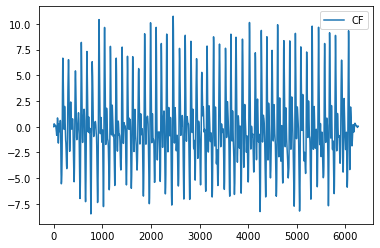

In [3]:
# Bagian soal 4

fs = 100; 
nyq = 0.5 * fs 
wn = 2/nyq; 

def lowpass(var): # PERLU JANGAN HAPUS LAGI SIN
    b, a = butter(2, wn, btype='low');
    return filtfilt(b, a, var);

def highpass(var): # PERLU JANGAN HAPUS LAGI SIN
    b,a = butter(2, wn, btype='high'); # highpass filter untuk data gyroscop
    return filtfilt(b, a, var); 

def findAtan(): # Soal 4
    atan = []
    for i in range(len(dataAcel)):
        atan.append(math.atan2(dataAcel.iloc[i]['Linear Acceleration z (m/s^2)'], dataAcel.iloc[i]['Linear Acceleration y (m/s^2)']))
    return atan

def integrals():
    gral = []
    for i in range(len(dataGyro)):
        ans, err = quad(lambda x : dataGyro.iloc[i]['Gyroscope z (rad/s)'],0,1)
        gral.append(ans)
    return gral

def buatgait(): # Salah lol
    gait = []
    gral = integrals()
    cel = findAtan()
    for i in range(len(dataGyro)):
        val = (gral[i] * 0.8) + (cel[i] * 0.2)
        gait.append(val)
    return  gait

def cfin():
    angle = []
    gral = integrals() # gyro angle
    for i in range(len(dataGyro)):
        if i == 0:
            angle.append((0.98*(0 + gral[i])) + (0.02 * (dataAcel.iloc[i]['Linear Acceleration y (m/s^2)'])))
        else: 
            angle.append((0.98*(gral[i-1] + gral[i])) + (0.02 * (dataAcel.iloc[i]['Linear Acceleration y (m/s^2)'])))
    return angle # hasilnya gait angle
# END SOAL 4

plt.plot(cfin(), label="CF")

plt.legend()
plt.show();